# Bibilioteki

In [1]:
#Bibilioteki
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym 
import math

ModuleNotFoundError: No module named 'numpy'

# Poszukiwanie miejsc zerowych

Uwaga wszystkie nazwy funkcji zostały zastąpione słowem "NAZWA". Odpowiednio nazwij funkcję, której chcesz użyć, np. jeżeli funkcja realizuje algorytm Newtona znajdowania miejsca zerowego to zamień słowo "NAZWA" na "Newton".

Użyj jednej z nazw:
* "Sieczne"
* "Newton"
* "Bisekcja"

In [2]:
# różne funkcje znajdujące pierwiastek 
def NAZWA(f, f_p1, x0, eps):
    i = 0
    while abs(f(x0)) > eps:
        i = i + 1
        x0 = x0 - f(x0) / f_p1(x0)
        #print("krok ",i, "nowy x ",x0)
    return x0

def NAZWA(f, a, b, eps):
    while (b - a) >= eps:
        t = (a+b) / 2
        if f(a)*f(t) < 0:
            b = t
        elif f(a)*f(t) > 0:
            a = t
        else:
            a,b = t,t
        #print("a =",a,"b=",b, "dx ->",(b-a))    # wydruk kontrolny działana funkcji
    return (b+a)/2

def NAZWA(f, x1, x0, eps):
    i=0
    while abs(f(x1)) > tol:
        i = i + 1
        xNowy = x1 - f(x1) * (x1-x0) / (f(x1)-f(x0))
        x0 = x1
        x1 = xNowy
        #print("krok ",i, "nowy x ",x1)   # wydruk kontrolny
    return x1

# Definiowanie funkcji jednej zmiennej

## Funkcja numeryczna

In [3]:
f = lambda x: x**2 + np.sin(x)

## Funkcja symboliczna

In [4]:
x = sym.Symbol('x')
sym_g = x**2 - sym.sin(x)  #żeby w obliczeniach symbolicznych użyć funkcji sin trzeba ją wziąć z biblioteki sym, a nie math lub np.
sym_g

x**2 - sin(x)

### Obliczenie pochodnych funkcji symbolicznej

In [5]:
# Obliczenie piewrszej pochodnej po x
sym_g_p1 = sym.diff(sym_g, x)
sym_g_p1

2*x - cos(x)

In [6]:
# Obliczenie drugiej pochodnej po x
sym_g_p2 = sym.diff(sym_g_p1, x)
sym_g_p2

sin(x) + 2

### Przejście z funkcji symboliczej na funkcję numeryczną

In [7]:
g = sym.lambdify(x,sym_g)

# Definiowanie funkcji dwóch zmiennych

## Funkcja numeryczna

In [8]:
f = lambda x, y : (x**2 + y) / (x**2 + 1)

## Funkcja symboliczna

In [9]:
x = sym.Symbol('x')
y = sym.Symbol('y')
sym_g = (x**2 + y) / (x**2 + 1)  #żeby w obliczeniach symbolicznych użyć funkcji sin trzeba ją wziąć z biblioteki sym, a nie math lub np.
sym_g

(x**2 + y)/(x**2 + 1)

### Obliczenie pochodnych funkcji symbolicznej

In [10]:
# Obliczenie piewrszej pochodnej po x
sym_g_p1_x = sym.diff(sym_g, x)
sym_g_p1_x

2*x/(x**2 + 1) - 2*x*(x**2 + y)/(x**2 + 1)**2

In [11]:
# Obliczenie drugiej pochodnej po x
sym_g_p2_x = sym.diff(sym_g_p1_x, x)
sym_g_p2_x

-8*x**2/(x**2 + 1)**2 + 8*x**2*(x**2 + y)/(x**2 + 1)**3 + 2/(x**2 + 1) - 2*(x**2 + y)/(x**2 + 1)**2

#### Uproszczenie wzoru

In [12]:
sym.simplify(sym_g_p2_x)

2*(3*x**2*y - 3*x**2 - y + 1)/(x**6 + 3*x**4 + 3*x**2 + 1)

### Przejście z funkcji symboliczej na funkcję numeryczną

In [13]:
g = sym.lambdify([x,y], sym_g)

# Sumowanie szeregu

Przykładowy kod na sumę szeregu. Trzeba dostosować do swoich potrzeb!

In [ ]:
def Szereg(eps):
    i=1
    n=2
    wyraz= 2/(np.sqrt(2) * (np.log(2))**2)
    suma=wyraz
    #print(n, " wyraz= ", wyraz, "   suma =", suma) # testowe 
    while abs(wyraz) > eps:
        n = n + 1
        i = i + 1
        wyraz = (-1)**n /(np.sqrt(n)*(np.log(n))**2)  
        suma=suma + wyraz
        #print(n, " wyraz= ", wyraz, "   suma =", suma) # testowe 
        if i==100:
            break  
    #print("Liczba wyrazow: ",i)
    return suma      

# Rysowanie wykresu funkcji jednej zmiennej

In [14]:
f = lambda x: 2+x**2

## Wydrukowanie funkcji f w danym przedziale

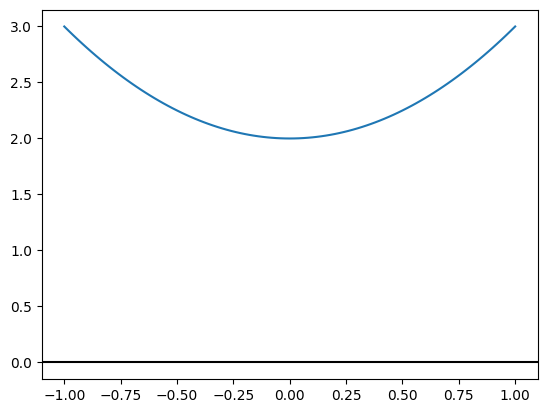

In [15]:
# Rysowanie wykresu funkcji w przedziale xA - xB

[xA,xB]=[-1,1]  # Przedział rysowania wykresu funkcji
n_pkt=101       # liczba punktów w xA- xB

s = np.linspace(xA, xB, n_pkt)   # punkty podziału x
#t = f(s)                         # wartości f(x)
t = [f(e) for e in s]            # działa gdy funkcja f jest stała. 
#Wybranie zakresu do narysowania w pionie i w poziomie
#ax = plt.gca()
#plt.set_xlim([xmin, xmax])
#ax.set_ylim([-1, 100])

plt.axhline(y=0, c='black')      #Wyświetla na czarno oś ox

plt.plot(s, t)
plt.show()

## Wydrukowanie funkcji f w danym przedziale + wydrukowanie punktów na tym wykresie

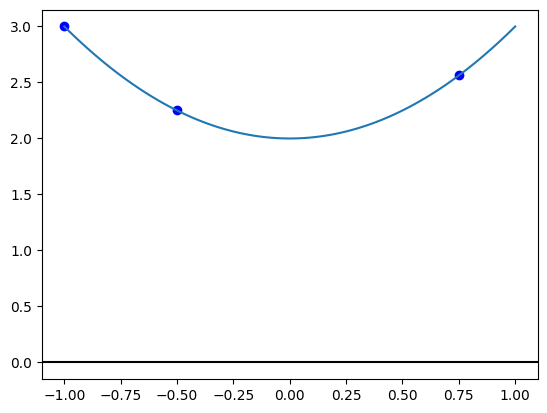

In [16]:
# Rysowanie wykresu funkcji w przedziale xA - xB

[xA,xB]=[-1,1]  # Przedział rysowania wykresu funkcji
n_pkt=101       # liczba punktów w xA- xB

s = np.linspace(xA, xB, n_pkt)   # punkty podziału x
#t = f(s)                         # wartości f(x)
t = [f(e) for e in s]            # działa gdy funkcja f jest stała. 

xRES = [-1,-0.5,0.75]                     # lista x-ów punktów do wydrukowania
yRES=[f(-1), f(-0.5), f(0.75)]                    # lista y-ów punktów do wydrukowania

#opcje rysunku
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.axhline(y=0, c='black')      #Wyświetla na czarno oś ox

# opcje rysowania punktów 
ax.scatter(xRES,yRES,c='blue')           # wartości funkcji w punkcie. końcowym - kolor niebieski

plt.plot(s, t)
plt.show()

In [17]:
def Szereg(eps):
    i=1
    n=2
    wyraz= 2/(np.sqrt(2) * (np.log(2))**2)
    suma=wyraz
    #print(n, " wyraz= ", wyraz, "   suma =", suma) # testowe 
    while abs(wyraz) > eps:
        n = n + 1
        i = i + 1
        wyraz = (-1)**n /(np.sqrt(n)*(np.log(n))**2)  
        suma=suma + wyraz
        #print(n, " wyraz= ", wyraz, "   suma =", suma) # testowe 
        if i==100:
            break  
    #print("Liczba wyrazow: ",i)
    return suma      